In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the Dataset
file_path = 'synthetic_wedm_data.csv'  # Update this if your dataset is in another location
df = pd.read_csv(file_path)

# Step 2: Define Features and Targets
features = ['Ton', 'Toff', 'IP', 'SV', 'WF', 'WT']
X = df[features]
y_cr = df['CR']  # Target 1: Cutting Rate
y_sr = df['SR']  # Target 2: Surface Roughness

In [3]:
# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_cr_train, y_cr_test = train_test_split(X, y_cr, test_size=0.2, random_state=42)
_, _, y_sr_train, y_sr_test = train_test_split(X, y_sr, test_size=0.2, random_state=42)

# Step 4: Train Regression Tree for CR
dt_cr = DecisionTreeRegressor(random_state=42)
dt_cr.fit(X_train, y_cr_train)
y_cr_pred_tree = dt_cr.predict(X_test)

# Step 5: Train Regression Tree for SR
dt_sr = DecisionTreeRegressor(random_state=42)
dt_sr.fit(X_train, y_sr_train)
y_sr_pred_tree = dt_sr.predict(X_test)

In [4]:
# Step 6: Evaluation Function
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"📊 Results for {label}")
    print(f"   → RMSE: {rmse:.4f}")
    print(f"   → R²:   {r2:.4f}")
    print(f"   → MAE:  {mae:.4f}\n")

# Evaluating Cutting Rate (CR)
evaluate(y_cr_test, y_cr_pred_tree, "Cutting Rate (CR) - Regression Tree")

# Evaluating Surface Roughness (SR)
evaluate(y_sr_test, y_sr_pred_tree, "Surface Roughness (SR) - Regression Tree")

📊 Results for Cutting Rate (CR) - Regression Tree
   → RMSE: 0.1242
   → R²:   0.9525
   → MAE:  0.0985

📊 Results for Surface Roughness (SR) - Regression Tree
   → RMSE: 0.0536
   → R²:   0.9623
   → MAE:  0.0433



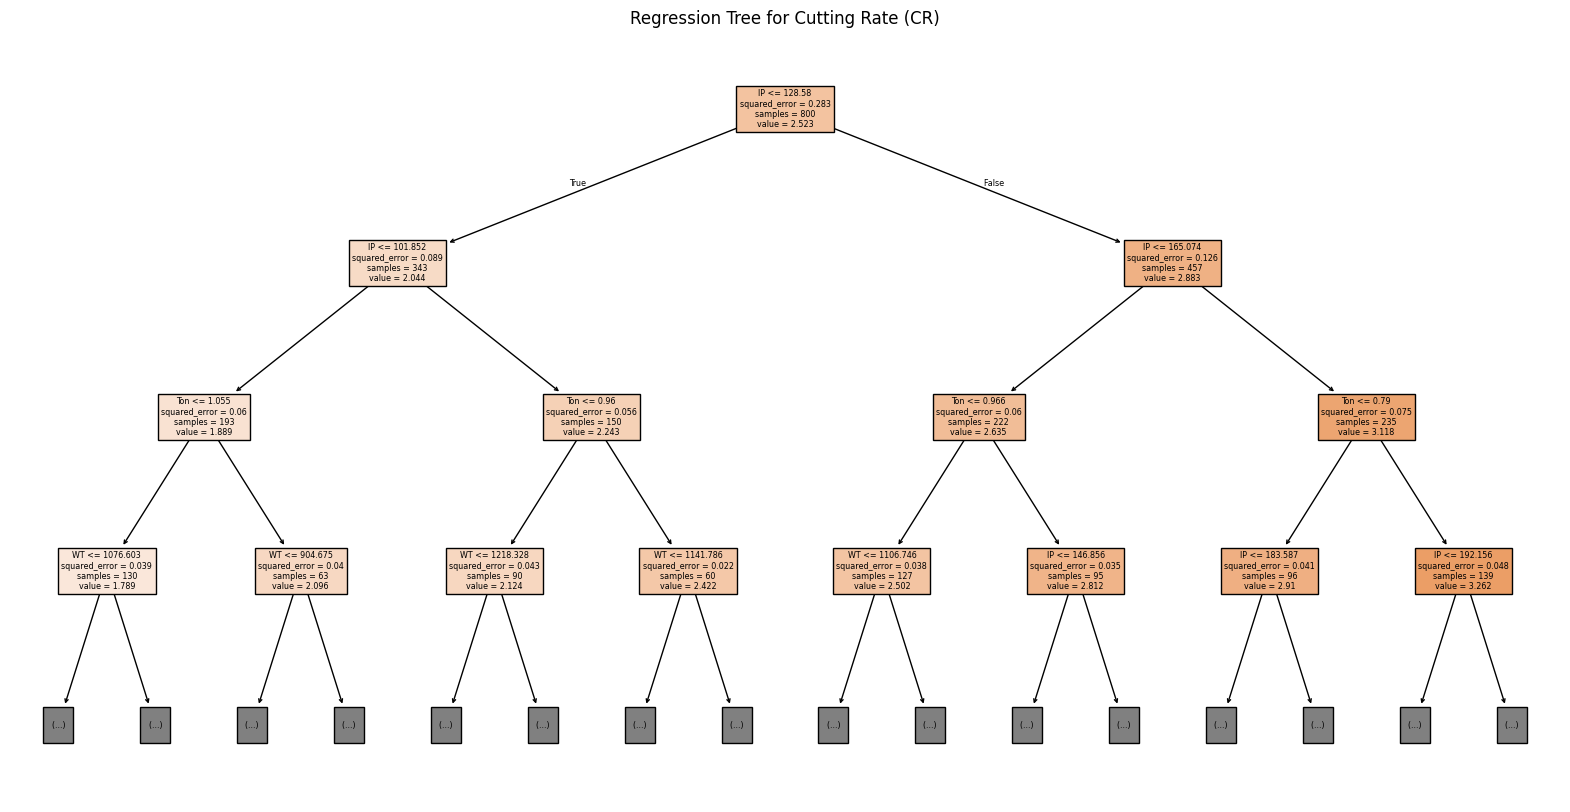

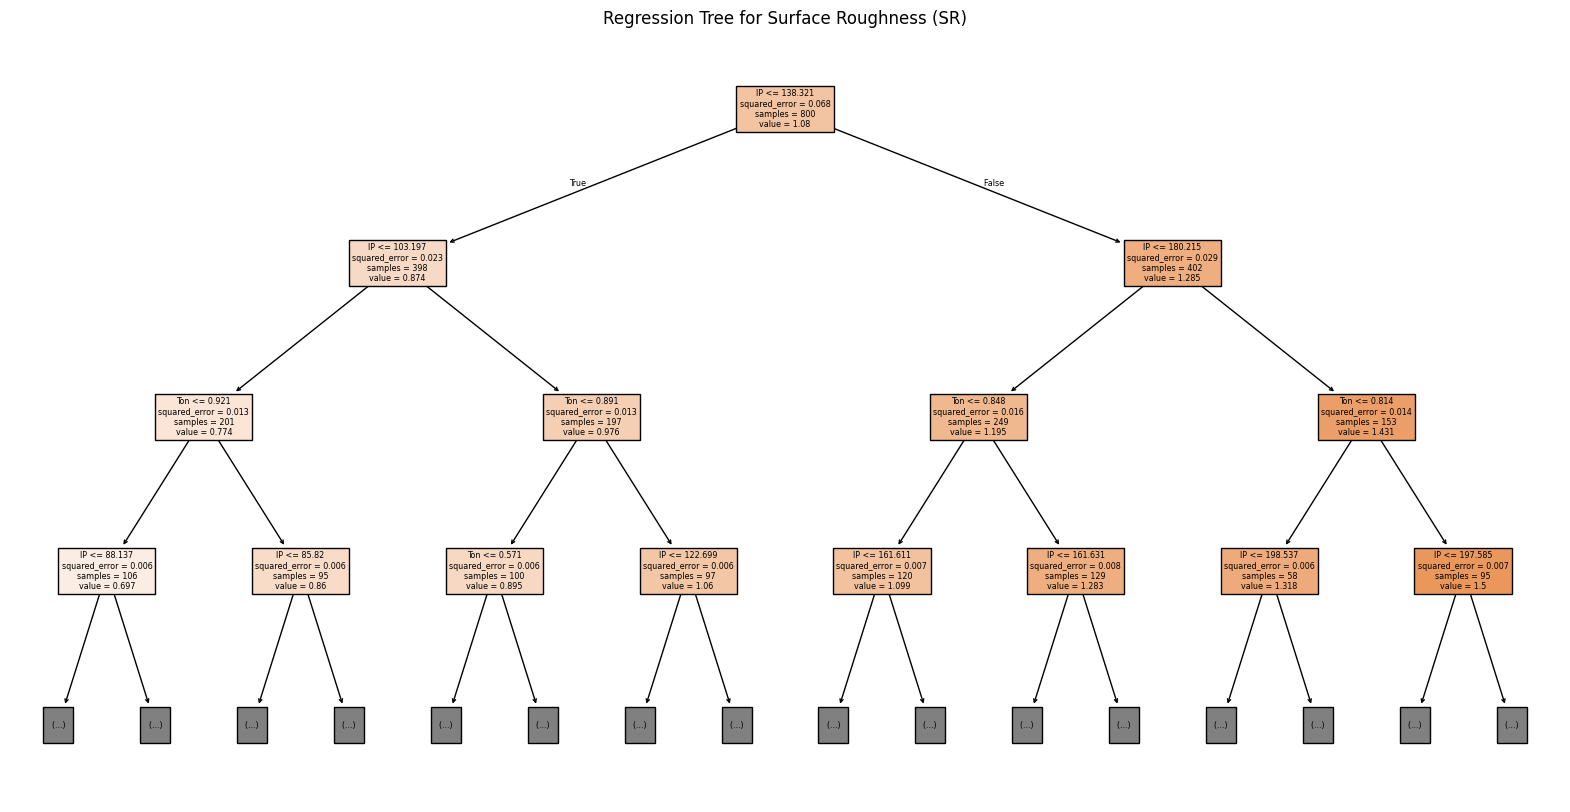

In [7]:
# Step 7: Visualize the Trees
# CR Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_cr, feature_names=features, filled=True, max_depth=3)
plt.title("Regression Tree for Cutting Rate (CR)")
plt.show()

# SR Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_sr, feature_names=features, filled=True, max_depth=3)
plt.title("Regression Tree for Surface Roughness (SR)")
plt.show()

In [8]:
import joblib

In [9]:
joblib.dump(dt_sr,"models/decision_tree_sr.pkl")
joblib.dump(dt_cr, "models/decision_tree_cr.pkl")

print("Exported Decision Tree Surface Roughness (SR) & Cutting Rate (CR) models")

Exported Decision Tree Surface Roughness (SR) & Cutting Rate (CR) models
